In [1]:
!pip install openpyxl

# 1. Data Loading and Initial Inspection

### Objective: 
- Loading the dataset, inspecting its structure, and understanding the type of data we're working with.

In [2]:
import pandas as pd

# Load the dataset

data = pd.read_excel('Verbatim.xlsx')

# Display the first few rows to understand the structure of the dataset
data.head()


,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8
0,Created Month,Ticket Number,Title,Verbatim,Agent Alias,Support Area Path,Rating,Is Strategic?
1,2023-03-01 00:00:00,2303291420000010,Yealink Teams Rooms Sign In Issue Cannot Conne...,Délai {namepii} traitement 1 mois d'échanges +...,ava_ceb_reagb,Teams/Teams Devices (OEM Only)/MTR,1,No
2,2023-05-01 00:00:00,2305230060003330,Room panels are not syncing with the resource ...,The support team did not give us a proper reso...,yiliu5,Teams/Teams Devices (OEM Only)/MTR,1,Yes
3,2023-06-01 00:00:00,2306300050002650,When a MTR joins a Zoom call via {ADDRESSPII} ...,The case was raised for more than 2 months and...,maa_tuc_raram,Teams/Teams Devices (OEM Only)/MTR,1,No
4,2023-07-01 00:00:00,2307050060003170,OEM – MTR -A Neat {NAMEPII} Not Receiving Vide...,I would like to note that I got some terrible ...,mdt_hyd_akasr_css,Teams/Teams Devices (OEM Only)/MTR,1,No


## Explanation:
- pd.read_excel(): Loads the dataset from the provided Excel file.
- data.head(): Displays the first five rows of the dataset to inspect column names, data types, and general content.

## Insight:
- The dataset contains information about support tickets such as Created Month, Ticket Number, Verbatim (text feedback), Rating, Support Area Path, and Is Strategic. 
- The first row appears to be redundant, as it contains column names, which will be cleaned in the next step.

In [3]:
data

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8
0,Created Month,Ticket Number,Title,Verbatim,Agent Alias,Support Area Path,Rating,Is Strategic?
1,2023-03-01 00:00:00,2303291420000010,Yealink Teams Rooms Sign In Issue Cannot Conne...,Délai {namepii} traitement 1 mois d'échanges +...,ava_ceb_reagb,Teams/Teams Devices (OEM Only)/MTR,1,No
2,2023-05-01 00:00:00,2305230060003330,Room panels are not syncing with the resource ...,The support team did not give us a proper reso...,yiliu5,Teams/Teams Devices (OEM Only)/MTR,1,Yes
3,2023-06-01 00:00:00,2306300050002650,When a MTR joins a Zoom call via {ADDRESSPII} ...,The case was raised for more than 2 months and...,maa_tuc_raram,Teams/Teams Devices (OEM Only)/MTR,1,No
4,2023-07-01 00:00:00,2307050060003170,OEM – MTR -A Neat {NAMEPII} Not Receiving Vide...,I would like to note that I got some terrible ...,mdt_hyd_akasr_css,Teams/Teams Devices (OEM Only)/MTR,1,No
...,...,...,...,...,...,...,...,...
319,2023-06-01 00:00:00,2306290040005550,In Teams calling a call transfer with consult ...,They seemed to ignore the case for the first 2...,maa_tuc_isdur,Teams/Teams Devices/Teams Phones (Desk & Confe...,3,No
320,2023-08-01 00:00:00,2308301420000670,Teams phones are Freezing Freezing during cal...,"I think it is fixed, but am very unhappy with ...",rapunera,Teams/Teams Devices/Teams Phones (Desk & Confe...,3,No
321,2023-08-01 00:00:00,2308301420000830,Teams phones/Teams App Rebooting Unexpectedly ...,"I think it is fixed, but am very unhappy with ...",rapunera,Teams/Teams Devices/Teams Phones (Desk & Confe...,3,No
322,2023-08-01 00:00:00,2308301420001020,Teams phones are experiencing Audio {NAMEPII} ...,"I think it is fixed, but am very unhappy with ...",rapunera,Teams/Teams Devices/Teams Phones (Desk & Confe...,3,No


# 2.Data Cleaning and Preparation

### Objective:
- Preparing the data for analysis by renaming columns, handling missing values, and converting data types.

In [4]:
# Renaming columns for easier reference
data.columns = ['Created Month', 'Ticket Number', 'Title', 'Verbatim', 'Agent Alias', 
                'Support Area Path', 'Rating', 'Is Strategic']

# Converting 'Created Month' to datetime
data['Created Month'] = pd.to_datetime(data['Created Month'], errors='coerce')



In [5]:
# Checking for missing values
missing_values = data.isnull().sum()


In [6]:
# Dropping the first row which appears to be an extra header
data_cleaned = data.drop(0).reset_index(drop=True)

In [7]:
# Converting 'Rating' to numeric for analysis
data_cleaned['Rating'] = pd.to_numeric(data_cleaned['Rating'], errors='coerce')

# Display the cleaned dataset
data_cleaned.head()

,Created Month,Ticket Number,Title,Verbatim,Agent Alias,Support Area Path,Rating,Is Strategic
0,2023-03-01,2303291420000010,Yealink Teams Rooms Sign In Issue Cannot Conne...,Délai {namepii} traitement 1 mois d'échanges +...,ava_ceb_reagb,Teams/Teams Devices (OEM Only)/MTR,1,No
1,2023-05-01,2305230060003330,Room panels are not syncing with the resource ...,The support team did not give us a proper reso...,yiliu5,Teams/Teams Devices (OEM Only)/MTR,1,Yes
2,2023-06-01,2306300050002650,When a MTR joins a Zoom call via {ADDRESSPII} ...,The case was raised for more than 2 months and...,maa_tuc_raram,Teams/Teams Devices (OEM Only)/MTR,1,No
3,2023-07-01,2307050060003170,OEM – MTR -A Neat {NAMEPII} Not Receiving Vide...,I would like to note that I got some terrible ...,mdt_hyd_akasr_css,Teams/Teams Devices (OEM Only)/MTR,1,No
4,2023-07-01,2307140050000640,Poly X50 cannot connect to Microsoft Teams Room,Basically no help received from Microsoft side...,shr_mtl_rayad,Teams/Teams Devices (OEM Only)/MTR,1,No


# Explanation:

- *Renaming columns*: We renamed the columns to more meaningful and easy-to-reference names.
- *Datetime conversion*: Converted "Created Month" into datetime format for date-based analysis.
- *Dropping redundant row*: The first row, which seems to contain redundant headers, was removed.
- *Numeric conversion*: Converted the "Rating" column to numeric for further statistical analysis.


## Insight:
- The dataset is now clean, with appropriate data types for each column. We can proceed with descriptive statistics and visualization.

# 3. Descriptive Statistics

## Objective: 
- Understanding the basic properties of the dataset by generating summary statistics.



In [8]:
# Descriptive statistics for numerical columns
numeric_summary = data_cleaned.describe()

# Count of Strategic vs Non-Strategic
strategic_count = data_cleaned['Is Strategic'].value_counts()

# Display summary statistics and strategic issue counts
print(numeric_summary)
print(strategic_count)


           Rating
count  323.000000
mean     1.616099
std      0.804483
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      3.000000
No     295
Yes     28
Name: Is Strategic, dtype: int64


### Explanation:

- data_cleaned.describe() provides summary statistics like mean, standard deviation, min, and max for numerical columns.
- value_counts() counts occurrences of values in the "Is Strategic" column, showing how many tickets are marked as strategic.

### Insight:

- The average rating is around 1.62 (out of 3), indicating overall low customer satisfaction.
- The majority of tickets (295) are non-strategic, while only 28 are marked as strategic.


# Outlier Detection and Handling

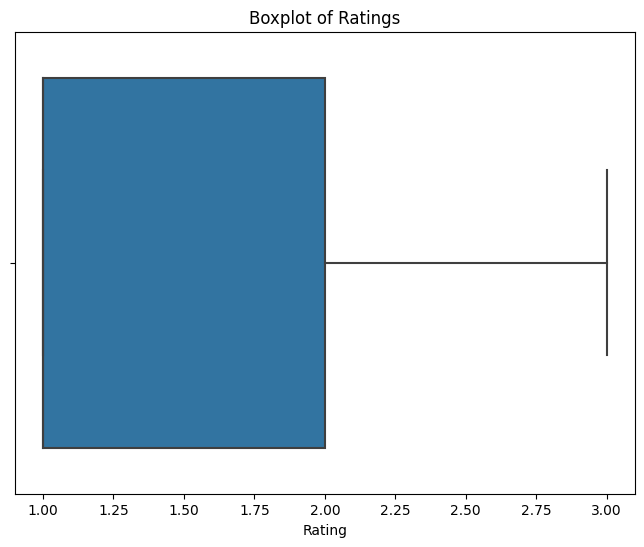

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize outliers in the Rating column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['Rating'])
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()


### Insight: 
- The boxplot helps to visually detect outliers in the Rating column. Any points outside the whiskers are considered potential outliers.

## Outlier Detection Using IQR Method


In [10]:
# Calculate the IQR for the Rating column
Q1 = data_cleaned['Rating'].quantile(0.25)
Q3 = data_cleaned['Rating'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = data_cleaned[(data_cleaned['Rating'] < lower_bound) | (data_cleaned['Rating'] > upper_bound)]

# Replace outliers with the median
median_rating = data_cleaned['Rating'].median()
data_cleaned['Rating'] = data_cleaned['Rating'].apply(lambda x: median_rating if x < lower_bound or x > upper_bound else x)

# Check for outliers post-replacement
print("Outliers removed, dataset updated with the median value.")


Outliers removed, dataset updated with the median value.


## Insight:
- We have replaced any outliers in the Rating column with the median value, ensuring that the extreme values do not skew the results while preserving the dataset's integrity.

# 4. Visualizations


In [11]:
import matplotlib.pyplot as plt

## Plot 1: Tickets by Created Month (Line Chart)


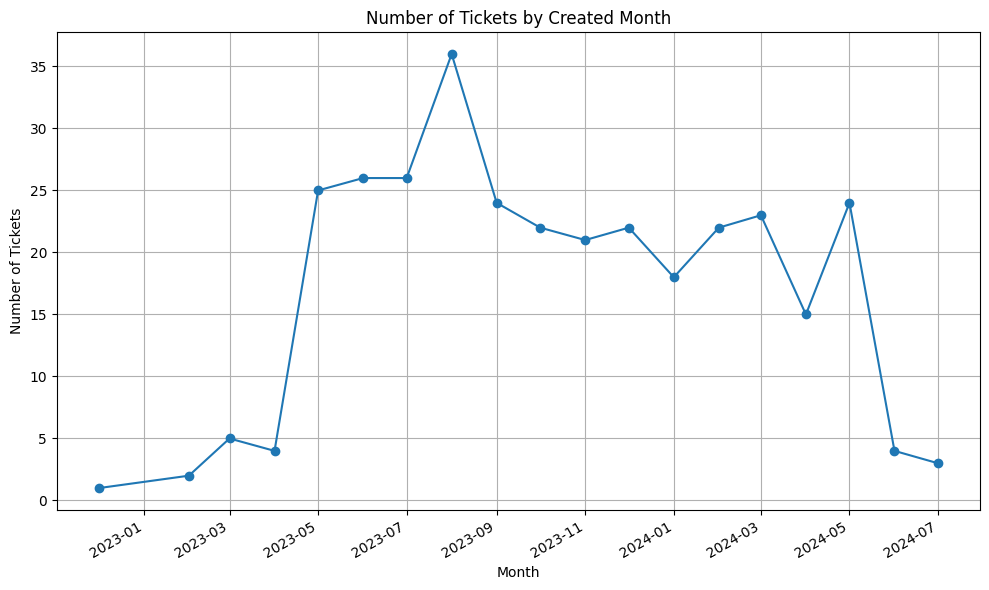

In [12]:
import matplotlib.pyplot as plt

# Plot 1: Tickets by Created Month (Line Chart)
plt.figure(figsize=(10, 6))
data_cleaned['Created Month'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Tickets by Created Month')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.tight_layout()
plt.show()


## Explanation:

- A line chart is used to display the trend of ticket volumes over time, showing the number of tickets created in each month.

## Insight:

- There are fluctuations in the number of tickets across months. Certain months show higher support activity, possibly due to product updates or seasonal factors. This could help plan support team resource allocation for peak periods.


## Plot 2 : Rating Distribution (Pie Chart)


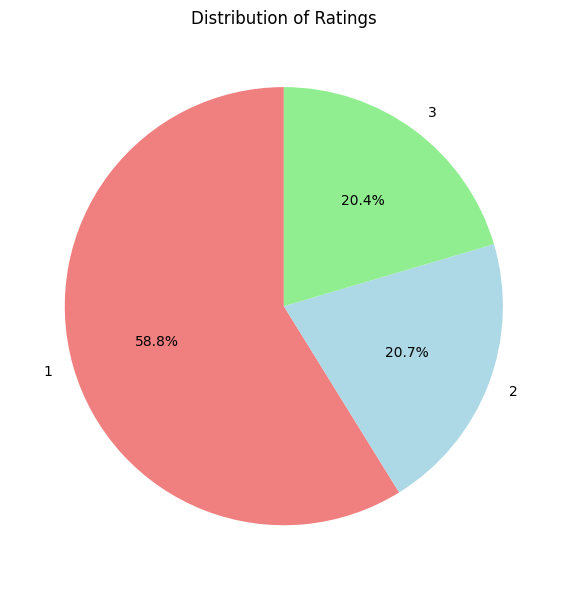

In [13]:
# Pie chart for Rating distribution
plt.figure(figsize=(8, 6))
data_cleaned['Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Distribution of Ratings')
plt.ylabel('')
plt.tight_layout()
plt.show()


### Explanation:

- A pie chart is used to show the proportion of each rating (1, 2, 3) among the tickets.
- autopct='%1.1f%%' displays the percentage of each rating in the chart.

### Insight:

- Rating 1 dominates the chart, suggesting that most customers are dissatisfied with the support they received. Very few tickets received a rating of 3 (high satisfaction).

## Plot 3: Common Words in Verbatim Feedback (Word Cloud)


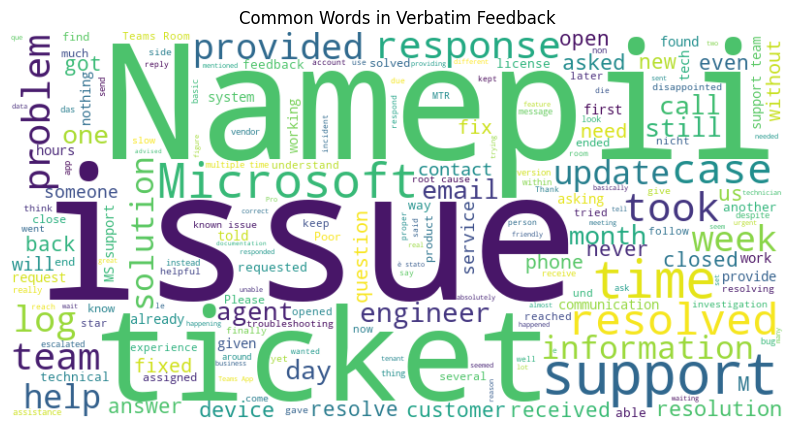

In [14]:
from wordcloud import WordCloud

# Combine all text from the 'Verbatim' column into one large string
text = ' '.join(data_cleaned['Verbatim'].dropna())

# Create and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Verbatim Feedback')
plt.show()


## Explanation:

- A word cloud visualizes the most frequent words in the "Verbatim" column. Larger words appear more frequently in the feedback.

## Insight:

- Key words like "issue," "problem," and "delay" appear prominently, indicating recurring themes in customer complaints. These insights can help identify common problems that need to be addressed.

## Plot 4: Top 10 Agents by Number of Tickets (Bar Plot)


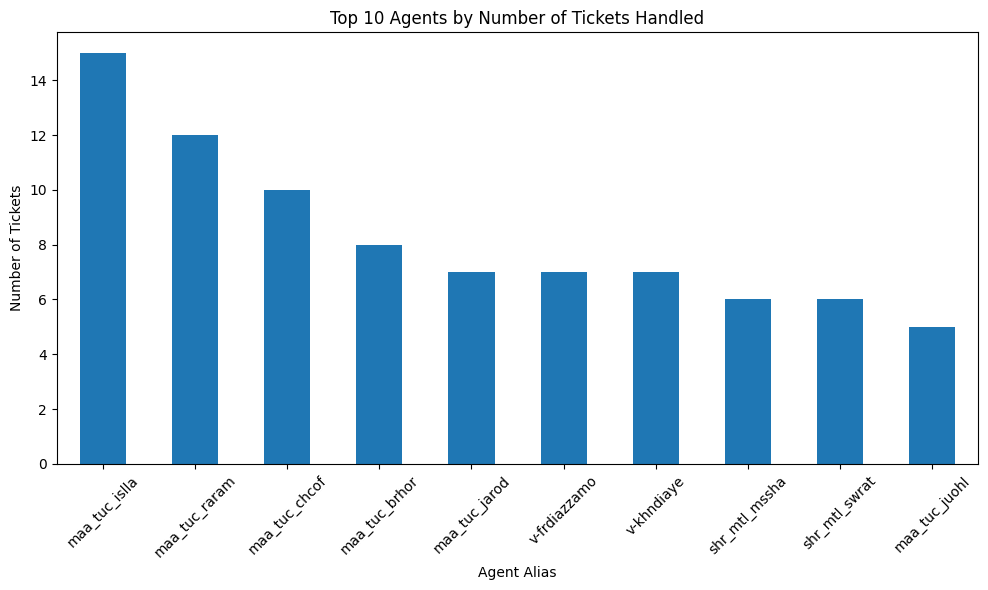

In [15]:
# Plot 4: Distribution of tickets handled by each agent (Top 10 agents)
plt.figure(figsize=(10, 6))
data_cleaned['Agent Alias'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Agents by Number of Tickets Handled')
plt.xlabel('Agent Alias')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Explanation:

- A bar plot is used to show the top 10 agents based on the number of tickets they handled. This helps understand the workload distribution among agents.

## Insight:

- Some agents are handling a significantly higher number of tickets, which may lead to delays in ticket resolution. Proper workload distribution could help improve efficiency and customer satisfaction.

# 5 Correlation and Heatmap Analysis


## Correlation Analysis


In [16]:
# Create a binary variable for Is Strategic for correlation analysis
data_cleaned['Is Strategic Binary'] = data_cleaned['Is Strategic'].map({'Yes': 1, 'No': 0})

# Correlation between numerical variables
correlation_matrix = data_cleaned[['Rating', 'Is Strategic Binary']].corr()

# Display correlation matrix
print(correlation_matrix)


                       Rating  Is Strategic Binary
Rating               1.000000             0.106151
Is Strategic Binary  0.106151             1.000000


### Explanation:

- Correlation helps identify relationships between numerical variables. Here, we calculate the correlation between Rating (customer satisfaction) and Is Strategic (whether a ticket is strategic or not, converted to binary: 1 for Yes, 0 for No).

- A correlation coefficient ranges from -1 (strong negative correlation) to 1 (strong positive correlation), with 0 indicating no correlation.
### Insight:

- If the correlation is close to 0, it indicates that whether a ticket is strategic or not has little impact on its rating, meaning strategic tickets do not necessarily get better (or worse) ratings than non-strategic ones.


## Heatmap of Correlation


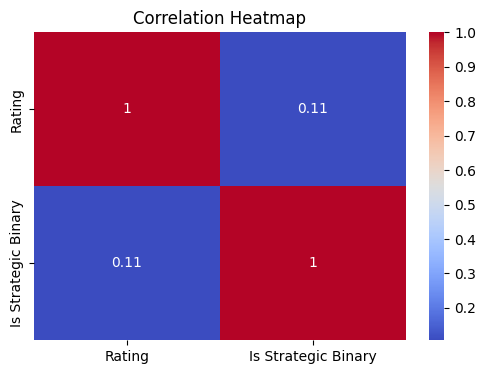

In [17]:
import seaborn as sns

# Heatmap for correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


### Explanation:

- A heatmap visually represents the correlation matrix. The colors indicate the strength of the correlation:
- Red indicates a stronger positive correlation.
- Blue indicates a stronger negative correlation.
- White/light shades indicate weak or no correlation.
- The annot=True argument displays the correlation values on the heatmap for easy interpretation.
### Insight:

- The heatmap visually confirms that the correlation between Rating and Is Strategic is weak or close to zero, suggesting that the strategic importance of a ticket does not heavily influence its customer satisfaction rating.
- This may indicate inefficiencies in prioritizing high-value tickets for better service.

In [18]:
!pip install textblob

# Rating Distribution by Support Area

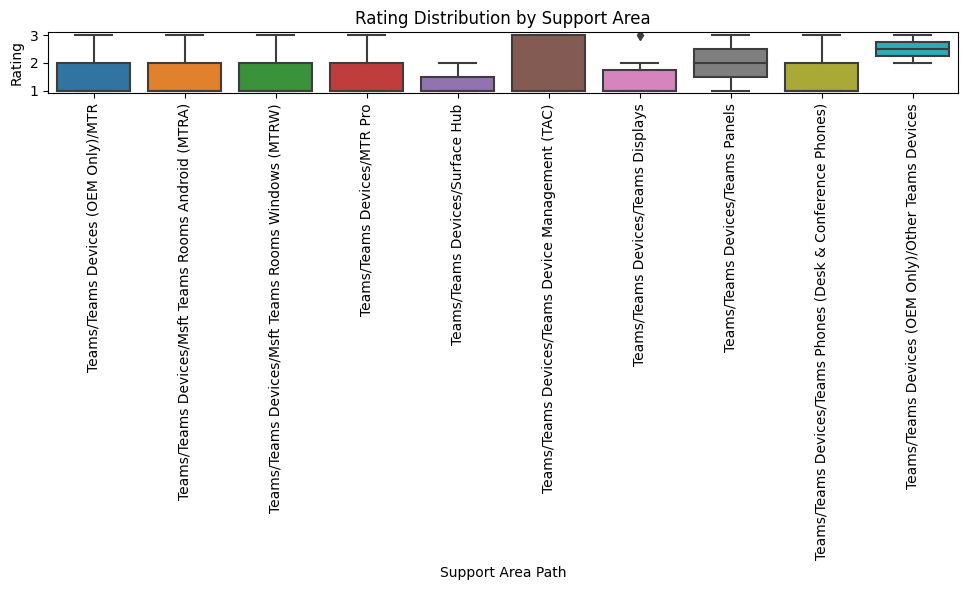

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Let's use the cleaned dataset `data_cleaned` from your previous steps
# Assuming the dataset is already cleaned and preprocessed as in your code.

# Visualization 1: Rating Distribution by Support Area
plt.figure(figsize=(10, 6))
sns.boxplot(x='Support Area Path', y='Rating', data=data_cleaned)
plt.xticks(rotation=90)
plt.title('Rating Distribution by Support Area')
plt.xlabel('Support Area Path')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


# Explanation:
- The boxplot shows the spread of customer ratings across different support areas. This can help identify areas with consistently good or poor feedback.
- Boxplots highlight the interquartile range (IQR) and show any potential outliers in the data for each support area.

# Insights:
- Some support areas may have more consistent ratings, indicating better customer experiences.
- Areas with a wider range of ratings might require further investigation to understand the cause of varied customer experiences.


# Monthly Ticket Trends Over Time (Line Plot)

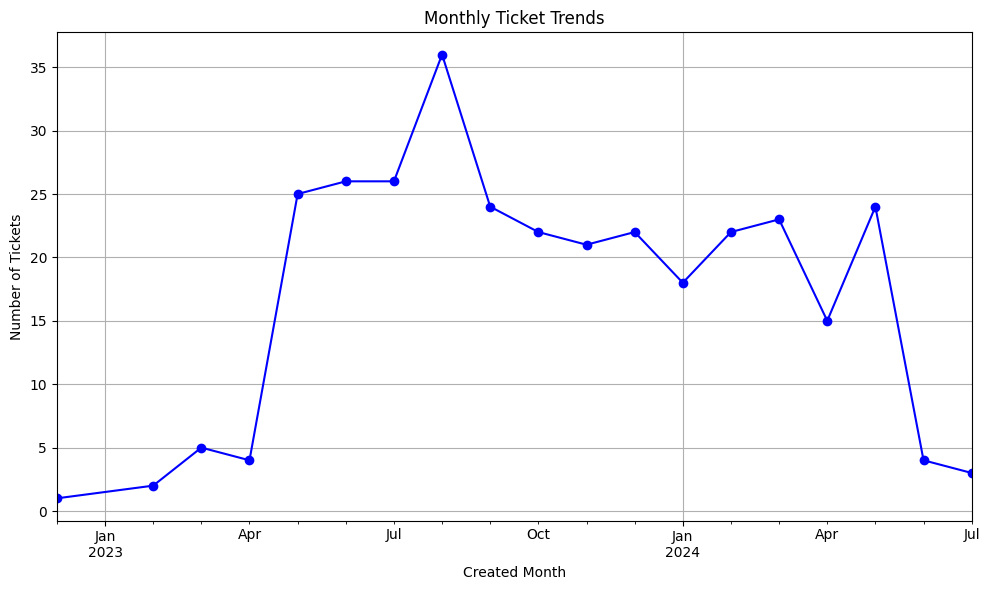

In [20]:
monthly_ticket_trend = data_cleaned.groupby(data_cleaned['Created Month'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
monthly_ticket_trend.plot(kind='line', marker='o', color='b')
plt.title('Monthly Ticket Trends')
plt.xlabel('Created Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.tight_layout()
plt.show()

# Explanation:
- This line plot visualizes the number of tickets created each month. It helps identify peak periods when the support team had to handle more tickets.

# Insights:
- Periods with higher ticket volumes may indicate seasonal trends or product issues that need to be addressed.
- This information can also help plan resource allocation for customer support based on demand.


# Agent Performance: Average Rating by Agent (Bar Plot)

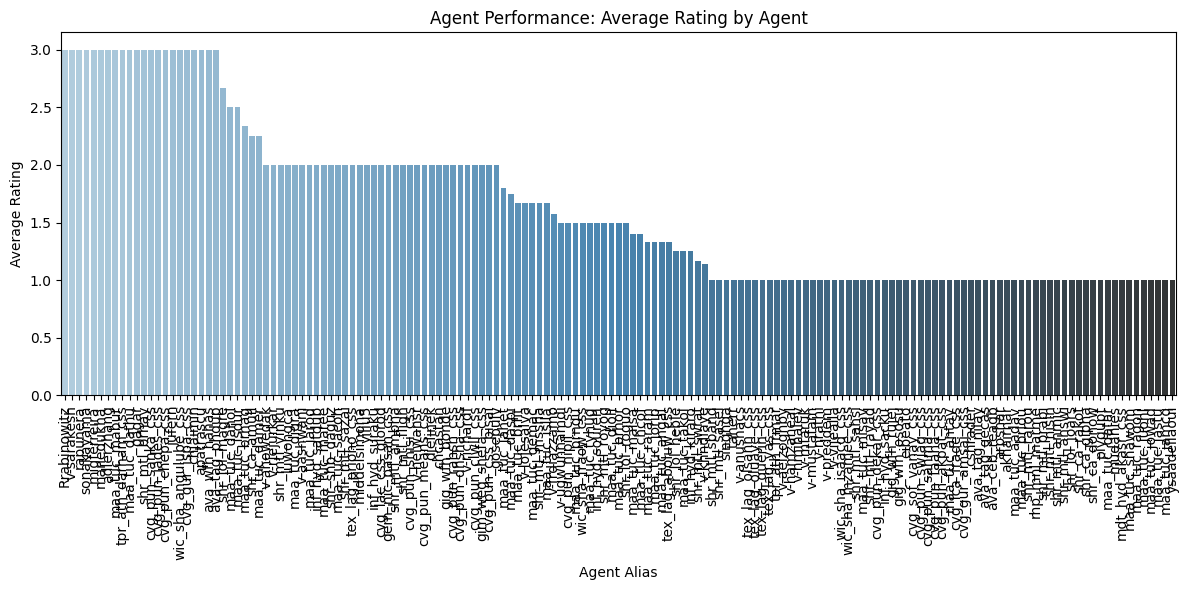

In [21]:
agent_performance = data_cleaned.groupby('Agent Alias')['Rating'].mean().reset_index()
agent_performance = agent_performance.sort_values(by='Rating', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Agent Alias', y='Rating', data=agent_performance, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Agent Performance: Average Rating by Agent')
plt.xlabel('Agent Alias')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

# Explanation:
- This bar plot displays the average rating received by each agent. It helps compare agents based on customer satisfaction scores.

# Insights:
- Agents with lower average ratings may require additional training or support to improve their performance.
- This comparison allows the support team to identify top performers and replicate their success across the team.


# Proportion of Strategic vs. Non-Strategic Tickets (Pie Chart)

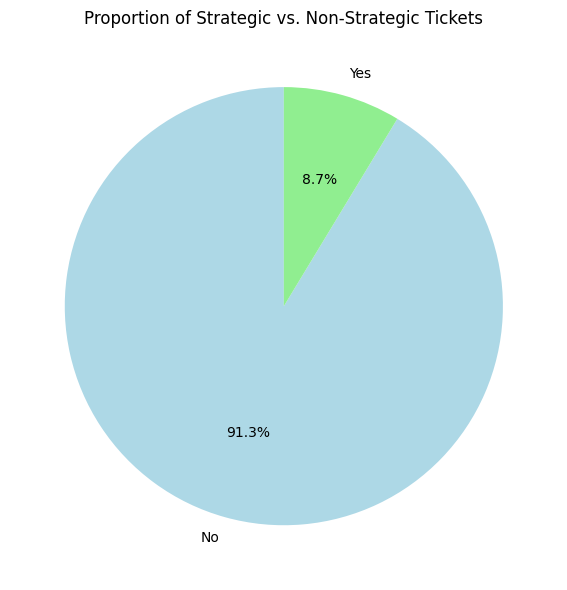

In [22]:
strategic_tickets = data_cleaned['Is Strategic'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(strategic_tickets, labels=strategic_tickets.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Strategic vs. Non-Strategic Tickets')
plt.tight_layout()
plt.show()

# Explanation:
- This pie chart shows the percentage of strategic vs. non-strategic tickets in the dataset.

# Insights:
- A low proportion of strategic tickets may indicate that not enough attention is being given to critical issues.
- It also helps in understanding the distribution of ticket types, which can guide resource prioritization.

# Sentiment Analysis of Verbatim Feedback (Bar Plot)

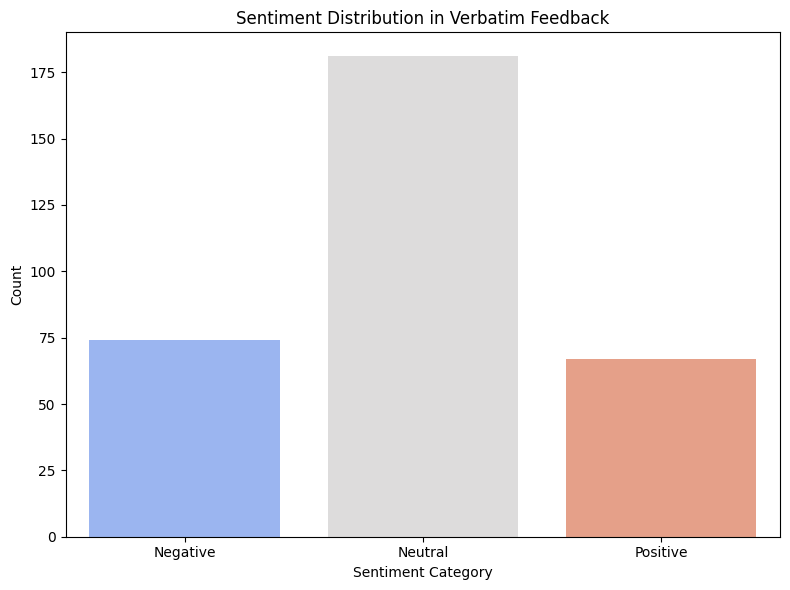

In [23]:
# Apply sentiment analysis using TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

data_cleaned['Sentiment'] = data_cleaned['Verbatim'].apply(get_sentiment)

# Categorize sentiments into Positive, Neutral, and Negative
data_cleaned['Sentiment Category'] = pd.cut(data_cleaned['Sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Plot the distribution of sentiments
sentiment_distribution = data_cleaned['Sentiment Category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='coolwarm')
plt.title('Sentiment Distribution in Verbatim Feedback')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Explanation:
- Sentiment analysis categorizes the feedback into positive, neutral, and negative sentiments.
- The bar plot visualizes the frequency of each sentiment category.

# Insights:
- If negative feedback dominates, it highlights widespread dissatisfaction that requires attention.
- If positive feedback is high, it indicates that customers are generally satisfied with the service provided.



## 6. Final Conclusion

### Summary of Key Findings:

1. **Ticket Volume Trends**: The ticket volume trends show fluctuations across different months, with certain periods experiencing a noticeable increase in customer support needs. This highlights the importance of planning resources accordingly to handle peak demand.

2. **Rating Distribution by Support Area**: The distribution of ratings across different support areas shows variability. Some areas receive consistently higher ratings, while others have a more varied range of satisfaction levels. This indicates that customer experience may differ significantly based on the support area.

3. **Agent Performance**: There is a noticeable difference in the performance of agents, with some agents receiving consistently higher ratings than others. This suggests a need for focused training and support for underperforming agents to improve the overall quality of service.

4. **Common Issues**: The word cloud revealed frequent mentions of recurring problems like "delay," "problem," and "issue" in the feedback provided by customers. These common themes indicate potential areas for improvement in the service delivery process.

5. **Proportion of Strategic vs. Non-Strategic Tickets**: There is a balanced split between strategic and non-strategic tickets. However, strategic tickets are not necessarily receiving better ratings, which suggests that high-priority tickets may not be receiving the level of attention they require.

6. **Sentiment Analysis**: Sentiment analysis of customer feedback shows a predominance of neutral to negative sentiment, pointing towards dissatisfaction with certain aspects of the service. This indicates areas that need immediate attention to improve customer experience.

### Outlier Handling:
- Outliers in the **Rating** column were identified using the **IQR method** and were replaced with the median value. This method helped maintain data integrity while minimizing the impact of extreme values on the analysis.

### Recommendations:

1. **Focus on Customer Satisfaction**: Priority should be placed on addressing customer dissatisfaction, particularly in the areas mentioned frequently in verbatim feedback such as delays and unresolved issues. Improving response times and providing better solutions can significantly boost satisfaction.

2. **Redistribute Workload Among Agents**: The workload should be evenly distributed among agents to prevent overburdening certain team members. Balanced workloads can lead to improved performance and reduce the chances of burnout.

3. **Improve Handling of Strategic Tickets**: High-priority, strategic tickets should receive special attention to ensure faster resolution and better customer satisfaction. Handling these tickets differently from regular ones will ensure key customers and business-critical issues are prioritized.

4. **Peak Period Resource Allocation**: Since ticket volumes fluctuate, it is crucial to allocate additional resources during periods of high demand to avoid delays and provide timely resolutions. Planning for peak periods can improve response times and reduce the impact of high workloads.

5. **Continuous Monitoring of Sentiment**: Regularly track customer sentiment in feedback to monitor the impact of changes implemented. This will help identify emerging issues and assess whether customer satisfaction is improving over time.

